# Market basket analysis with Apriori Algorithm
## Introduction
In this analysis, we perform Market Basket Analysis (MBA) using the Apriori algorithm to uncover association rules among items in retail transactions. We'll visualize support, confidence, and lift metrics to understand the relationships between items.

### Setup
# Required installations

In [3]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load data

In [9]:
df = pd.read_excel("C:/Users/skipr/Downloads/OnlineRetail (2).xlsx")
df.head()

C:\Users\skipr\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
C:\Users\skipr\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Preparation

In [10]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [11]:
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [12]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

C:\Users\skipr\AppData\Local\Temp\ipykernel_15776\3972572877.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


In [13]:
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [14]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

C:\Users\skipr\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# Apriori Algorithm and Association Rules

In [15]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859,0.964734
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383,0.959283
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061,0.960466


In [16]:
aa=rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]


In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Visualization

## Plot for support

C:\Users\skipr\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\skipr\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\skipr\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


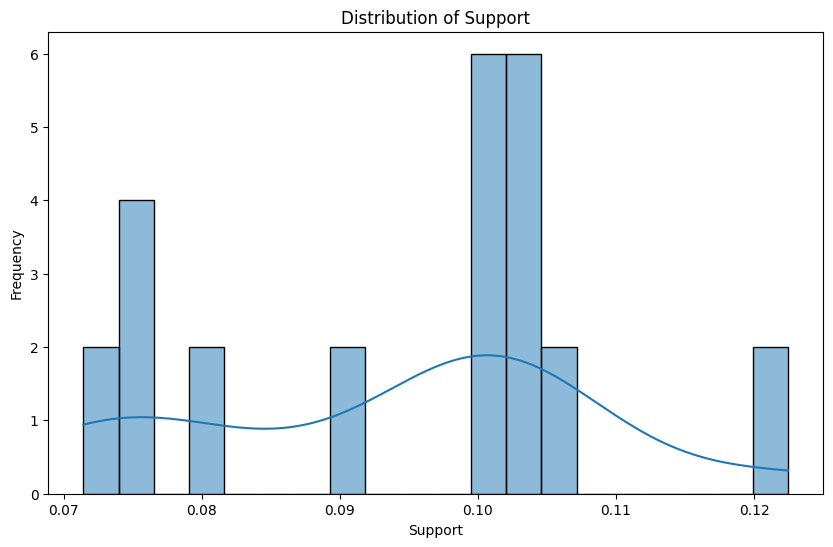

In [20]:
# Plotting support
plt.figure(figsize=(10, 6))
sns.histplot(rules['support'], bins=20, kde=True)
plt.title('Distribution of Support')
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.show()




# Plot for confidence

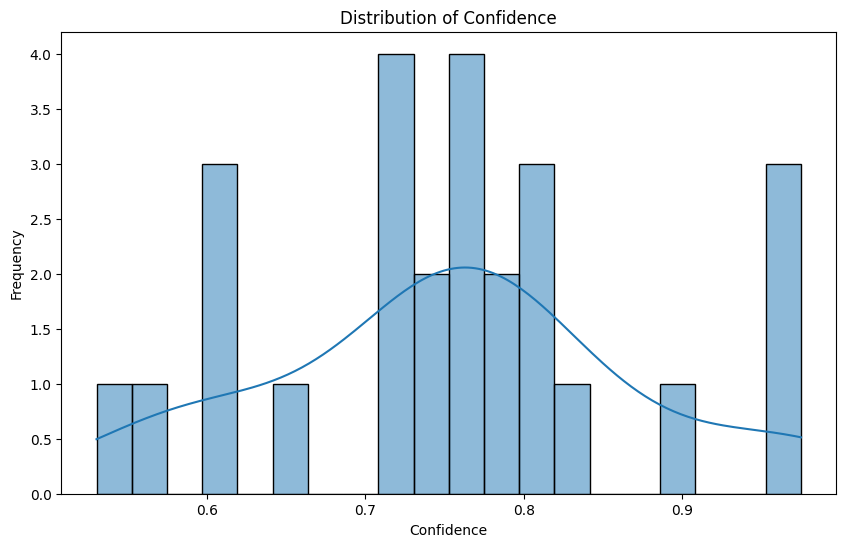

In [21]:
# Plotting confidence
plt.figure(figsize=(10, 6))
sns.histplot(rules['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

## Plot for lift

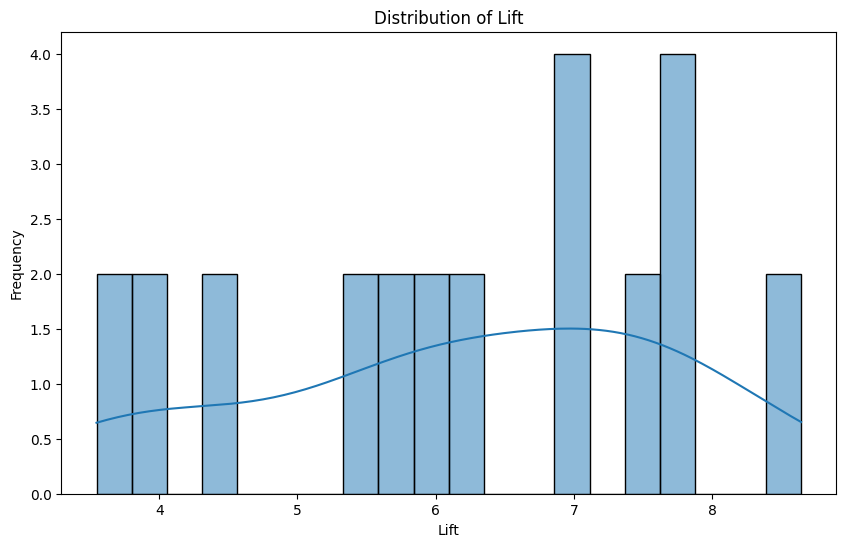

In [22]:

# Plotting lift
plt.figure(figsize=(10, 6))
sns.histplot(rules['lift'], bins=20, kde=True)
plt.title('Distribution of Lift')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.show()


## Correltion Heat map

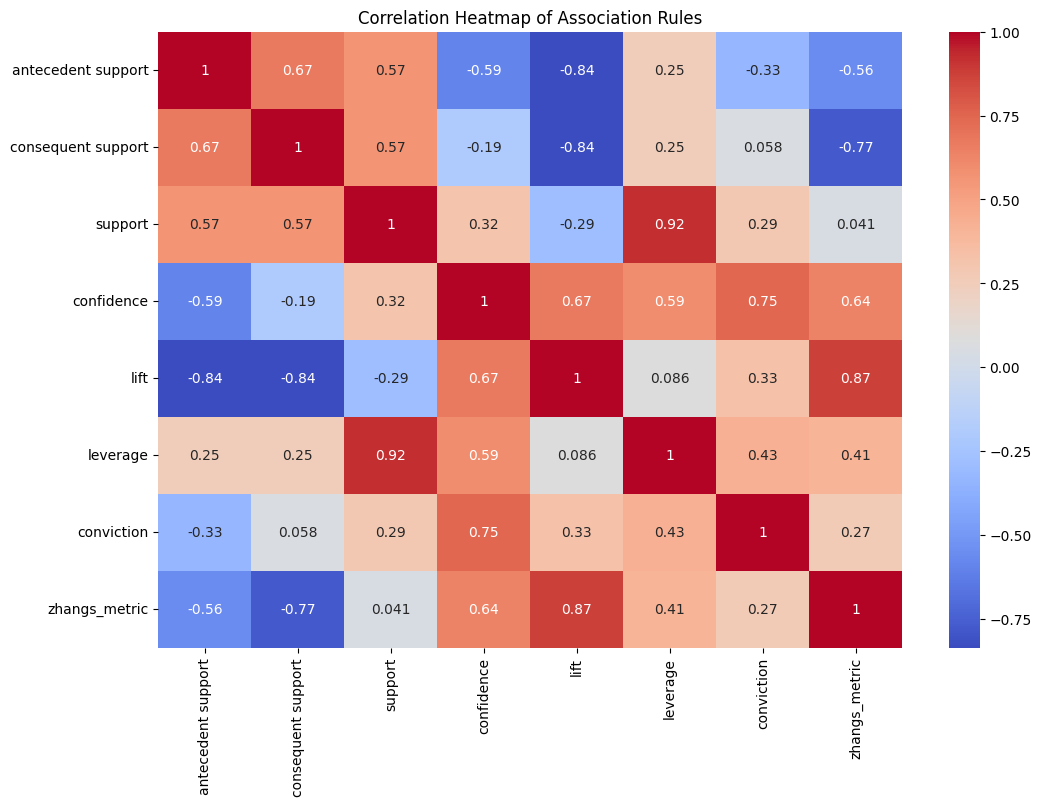

In [23]:
# Filter out non-numeric columns from the association rules dataframe
numeric_cols = rules.select_dtypes(include=['number']).columns
rules_numeric = rules[numeric_cols]

# Calculate correlation only for numeric columns
corr_matrix = rules_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Association Rules')
plt.show()



## Word cloud plot for Item description

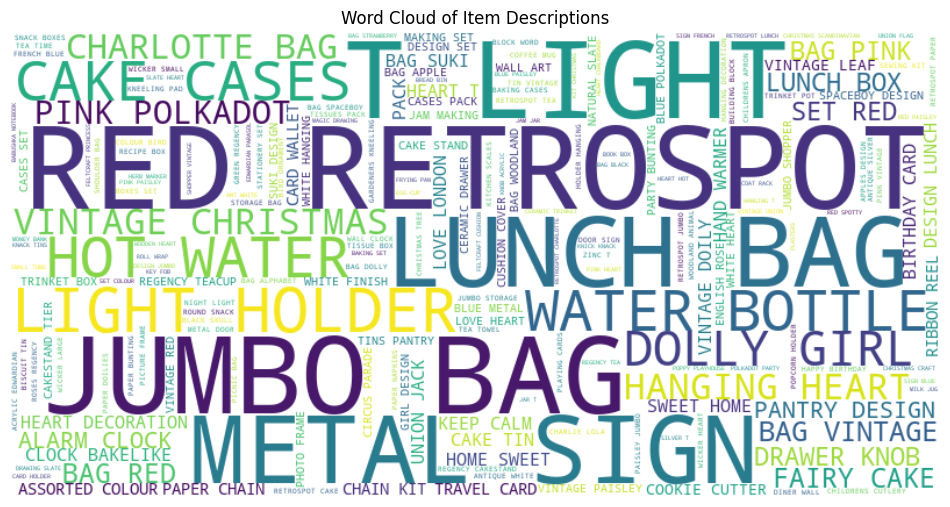

In [24]:
# Combine item descriptions into a single string
all_descriptions = ' '.join(df['Description'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(all_descriptions)

# Plot word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Item Descriptions')
plt.show()


## Pie chart of the top 5 most frequent items

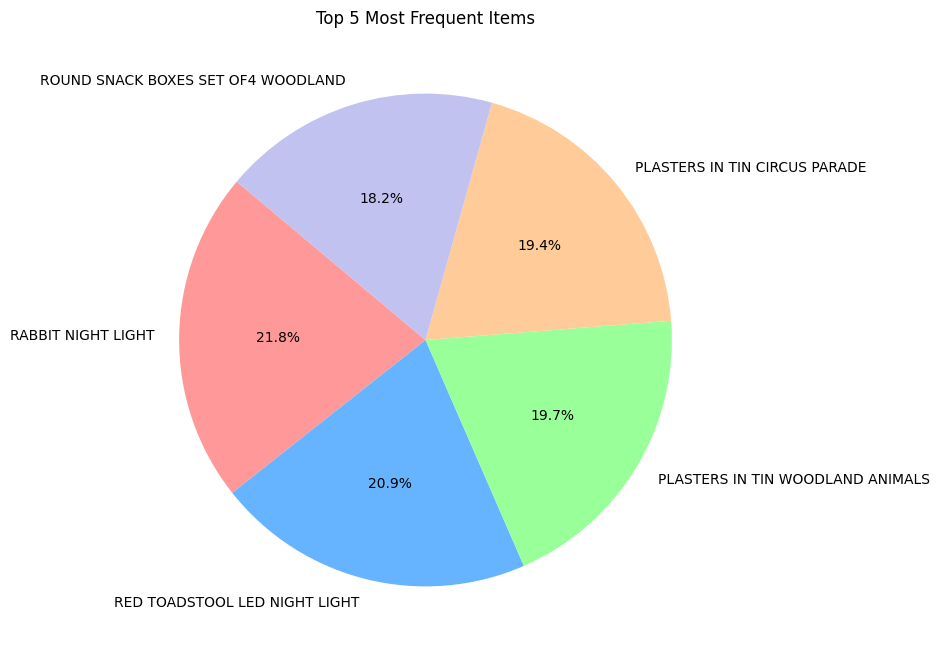

In [26]:

top_items = basket_sets.sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_items, labels=top_items.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Top 5 Most Frequent Items')
plt.show()



## Box plots of support, confidence, and lift

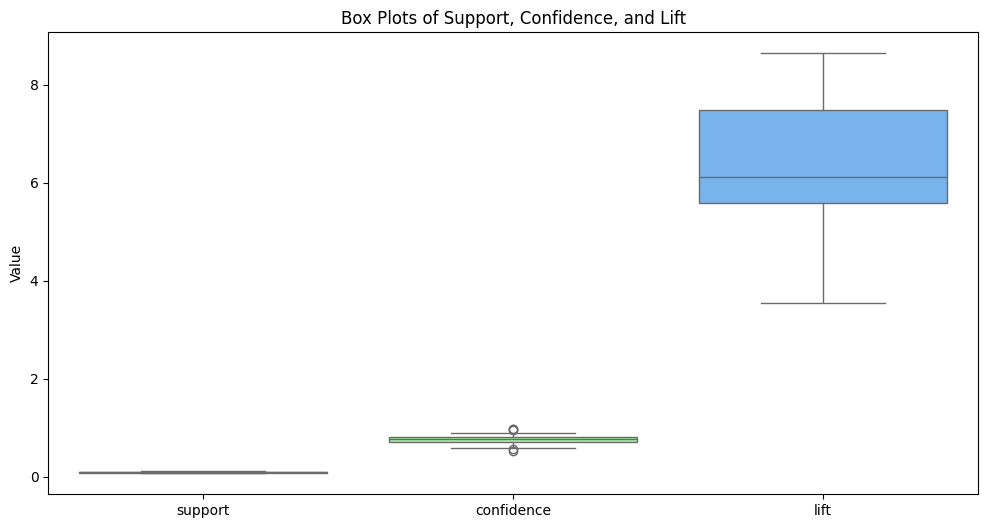

In [27]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=rules[['support', 'confidence', 'lift']], palette=['#ff6666','#99ff99','#66b3ff'])
plt.title('Box Plots of Support, Confidence, and Lift')
plt.ylabel('Value')
plt.show()

## Parallel Coordinates for Association rules metrics

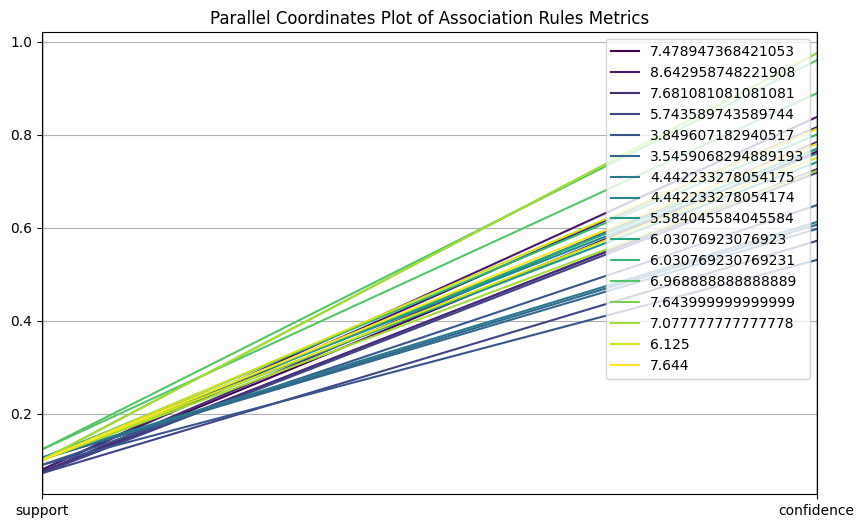

In [32]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10, 6))
parallel_coordinates(rules[['support', 'confidence', 'lift']], 'lift', colormap='viridis')
plt.title('Parallel Coordinates Plot of Association Rules Metrics')
plt.show()


## Visual for association rules 

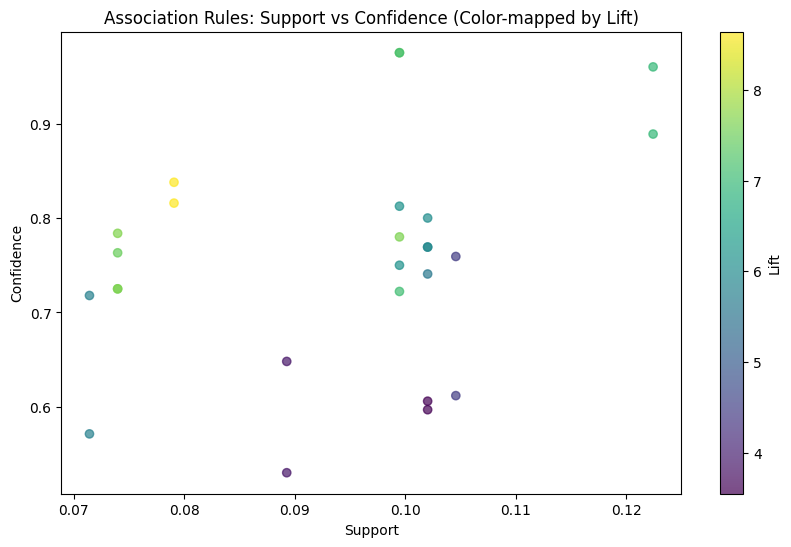

In [31]:

# Visual for association rules (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (Color-mapped by Lift)')
plt.show()

# Parameter Tuning Analysis

In [33]:
# Parameter Tuning Analysis

# Explore different min_support values
min_support_values = [0.05, 0.07, 0.1]
for min_support in min_support_values:
    frequent_itemsets = apriori(basket_sets, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    print(f"Min Support: {min_support}")
    print(rules.head())

# Explore different min_threshold values for association rules
min_threshold_values = [0.8, 0.9, 1.0]
for min_threshold in min_threshold_values:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)
    print(f"Min Threshold: {min_threshold}")
    print(rules.head())

# Apriori Algorithm and Association Rules with Optimized Parameters

frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

aa=rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]


C:\Users\skipr\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\skipr\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\skipr\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\skipr\AppData\Local\Programs\Python\Pyth

Min Support: 0.05
                    antecedents                   consequents  \
0   (ALARM CLOCK BAKELIKE PINK)  (ALARM CLOCK BAKELIKE GREEN)   
1  (ALARM CLOCK BAKELIKE GREEN)   (ALARM CLOCK BAKELIKE PINK)   
2    (ALARM CLOCK BAKELIKE RED)  (ALARM CLOCK BAKELIKE GREEN)   
3  (ALARM CLOCK BAKELIKE GREEN)    (ALARM CLOCK BAKELIKE RED)   
4    (ALARM CLOCK BAKELIKE RED)   (ALARM CLOCK BAKELIKE PINK)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.102041            0.096939  0.073980    0.725000  7.478947   
1            0.096939            0.102041  0.073980    0.763158  7.478947   
2            0.094388            0.096939  0.079082    0.837838  8.642959   
3            0.096939            0.094388  0.079082    0.815789  8.642959   
4            0.094388            0.102041  0.073980    0.783784  7.681081   

   leverage  conviction  zhangs_metric  
0  0.064088    3.283859       0.964734  
1  0.064088    3.791383       0.959283  
2  0.

C:\Users\skipr\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\skipr\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\skipr\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


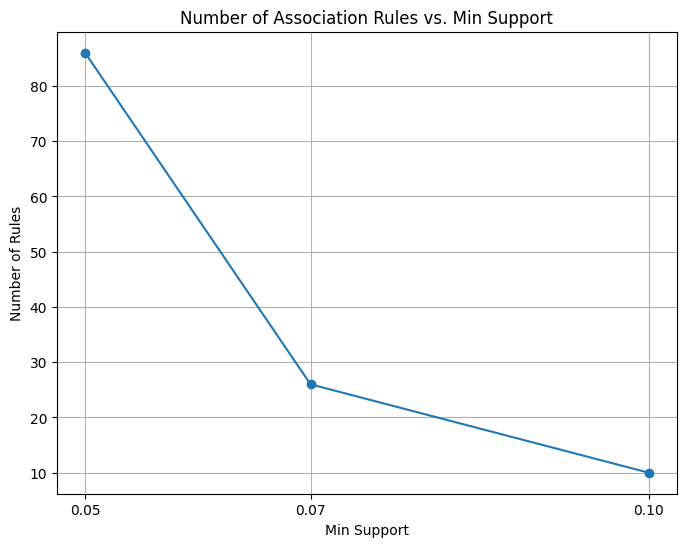

In [34]:
# Parameter Tuning Analysis with Visualization

# Explore different min_support values
min_support_values = [0.05, 0.07, 0.1]
num_rules_support = []

for min_support in min_support_values:
    frequent_itemsets = apriori(basket_sets, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    num_rules_support.append(len(rules))

plt.figure(figsize=(8, 6))
plt.plot(min_support_values, num_rules_support, marker='o')
plt.title('Number of Association Rules vs. Min Support')
plt.xlabel('Min Support')
plt.ylabel('Number of Rules')
plt.xticks(min_support_values)
plt.grid(True)
plt.show()





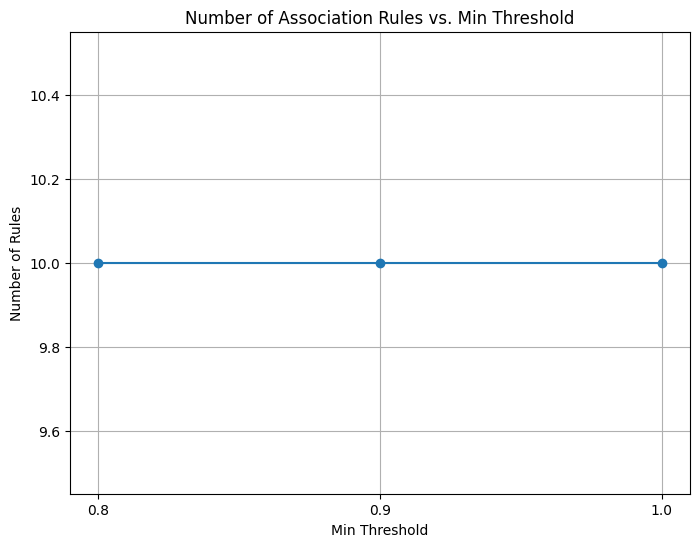

In [35]:
# Explore different min_threshold values for association rules
min_threshold_values = [0.8, 0.9, 1.0]
num_rules_threshold = []

for min_threshold in min_threshold_values:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)
    num_rules_threshold.append(len(rules))

plt.figure(figsize=(8, 6))
plt.plot(min_threshold_values, num_rules_threshold, marker='o')
plt.title('Number of Association Rules vs. Min Threshold')
plt.xlabel('Min Threshold')
plt.ylabel('Number of Rules')
plt.xticks(min_threshold_values)
plt.grid(True)
plt.show()

In [40]:
# Apriori Algorithm and Association Rules with Optimized Parameters

frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Convert DataFrame columns to bool type
rules['lift'] = rules['lift'].astype(bool)
rules['confidence'] = rules['confidence'].astype(bool)

aa = rules[(rules['lift']) & (rules['confidence'])]





C:\Users\skipr\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
